#### 加载包以及更改工作路径

In [9]:
# 加载包以及更改工作路径
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns


#### 自定义函数

In [10]:

def missvalve(df):
    print( "-------------------缺失值的检测与处理部分-------------------\n")
    print( "--------------数据大小为 " + str(df.shape)+ " ---------------")
    nrow1 = list( df.shape)[0]
    print("{:<30s} {:<50s}".format( "列标签",  "缺失值个数 \n" ) )
    df.replace(0, np.nan, inplace = True)
    neq_sum = 0
    for item in df.columns:
        neg_item = df[item].isnull()
        print("{:<30s} {:<50s}".format( item,  str( neg_item.sum() ) ) )
        neq_sum = neq_sum + neg_item.sum()
    if neq_sum == 0:   
        print( '\n--------------在所有列中共有 ' + str( neq_sum )  + ' 个缺失值-------------')
        print( "----------恭喜你，已经得到了没有缺失值的数据-----------")
    else:      
        print( '\n--------------在所有列中共有 ' + str( neq_sum )  + ' 个缺失值-------------')
        print( "--------下面将先删除数据中的每行保留值小于4的缺失行--------")
        df.dropna( thresh=4 , inplace =True)
        print( "--------------下面将对剩下的缺失值按行填充---------------")
        df.fillna(method='bfill', inplace =True) 
        df.fillna(method='ffill', inplace =True)
        neq_sum = 0
        for item in df.columns:
            neg_item = df[item].isnull()
            neq_sum = neq_sum + neg_item.sum()
        if neq_sum == 0:
            
            nrow2 = list( df.shape)[0]
            print( "------------------ 处理了"+ str(nrow1 - nrow2) + "条缺失数据--------------------")
            print( '\n--------------现在所有列中共有 ' + str( neq_sum )  + ' 个缺失值-------------')
            print( "----------恭喜你，已经得到了没有缺失值的数据----------")
            print( "-------------经过处理后数据大小为 " + str(df.shape)+ " ----------------")
        else:
            df = df_drop.na() 
            print( '\n------------在所有列中共有 ' + '0'  + ' 个缺失值-----------')
            nrow2 = list( df.shape)[0]
            print( "------------------ 我们处理了"+ str(nrow1 - nrow2) + "条缺失数据--------------------")
            print( "---------------恭喜你，已经得到了没有缺失值的数据---------------")   
            print( "-----------------经过处理后数据大小为 " + str(df.shape)+ " --------------------")
    return df  


In [11]:


def duplicatevalve(df):
    print( "--------------------重复值的检测与处理部分-------------------\n")
    print( "--------------数据大小为 " + str(df.shape)+ " --------------")
    nrow1 = list( df.shape)[0]
    print("{:<30s} {:<50s}".format( "列标签",  "重复值个数 \n" ) )
    neq_sum = 0
    for item in df.columns:
        neg_item = df[item].duplicated()
        print("{:<30s} {:<50s}".format( item,  str( neg_item.sum() ) ) )
        neq_sum = neq_sum + neg_item.sum()
    if neq_sum == 0:   
        print( '\n------------在整个数据中并不存在完全重复的行-----------\n' )
        print( "-----------恭喜你，无需任何处理操作----------")
    else:      
        print( '\n------------在所有列中共有 ' + str( neq_sum )  + ' 个重复值-----------\n' )
        print( "-----------下面将先删除数据中完全重复的行数据----------" )
        # 所有字段相同 去重
        df.drop_duplicates(subset=None, keep='first', inplace =True ) 
        # 特定字段相同 去重
        # df.drop_duplicates(subset="sh_name", keep='first', inplace=False)
        # df.drop_duplicates(subset=["sh_name","fq7_name"], keep='first', inplace=False)
        
        nrow2 = list( df.shape)[0]
        print( "------------------ 删除"+ str(nrow1 - nrow2) + "条重复数据--------------------")
        print( "-----------------经过处理后数据大小为 " + str(df.shape)+ " --------------------")
        print( "---------------恭喜你，已经得到了具有唯一值的数据--------------" )
    return df  




In [12]:

def abnormalvalue(df):
     print( "-------------------异常值的检测与处理部分-------------------\n")
     print( "--------------数据大小为 " + str(df.shape)+ " ---------------")
     nrow1 = list( df.shape)[0]
     print("{:<30s} {:<50s}".format( "列标签",  "异常值个数 \n" ) )
     neq_sum = 0
     neq_sum2 = 0
     
     for item in df.columns:
         neg_item = ( abs((df[item] - df[item].mean())/df[item].std())>3 )
         print("{:<30s} {:<50s}".format( item,  str( neg_item.sum() ) ) )
         neq_sum = neq_sum + neg_item.sum()
         
       
         
     if (neq_sum == 0)&( neq_sum2 == 0):   
        print( '\n--------------在所有列中共有0条异常值-------------')
        print( "----------恭喜你，已经得到了没有异常值的数据-----------")  
     else:      
         print( '\n--------------3西格玛准则下, 在所有列中共有 ' + str( neq_sum )  + ' 个异常值-------------')
         print( "-----------下面将先删除数据中存在异常的行数据----------")
         for item in df.columns: 
             df = df[abs((df[item] - df[item].mean())/df[item].std())<=3]
         nrow2 = list( df.shape)[0]
         print( "------------------3西格玛, 我们删除了"+ str(nrow1 - nrow2) + "条异常数据--------------------")
         
         print("{:<30s} {:<50s}".format( "\n 列标签",  "异常值个数 \n" ) ) 
         
         for item2 in df.columns:
            iqr = df[item2].quantile(0.75) - df[item2].quantile(0.25)
            q_abnormal_L = (df[item2] - (df[item2].quantile(0.25) - 1.5 * iqr) < 0)
            q_abnormal_U = (df[item2] - (df[item2].quantile(0.75) + 1.5 * iqr) > 0)
            neg_item2 =  q_abnormal_L.sum() + q_abnormal_U.sum()
            print("{:<30s} {:<50s}".format( item2,  str( neg_item2.sum() ) ) )
            neq_sum2 = neq_sum2 + neg_item2.sum()
         print( '\n--------------此时在箱线图准则下, 在所有列中共有 ' + str( neq_sum2 )  + ' 个异常值-------------')
         for item2 in df.columns: 
             iqr = df[item2].quantile(0.75) - df[item2].quantile(0.25)
             df = df[(df[item2] - (df[item2].quantile(0.25) - 1.5 * iqr))>=0]
         for item2 in df.columns: 
             iqr = df[item2].quantile(0.75) - df[item2].quantile(0.25)
             df = df[(df[item2] - (df[item2].quantile(0.75) + 1.5 * iqr))<=0]      
         nrow3 = list( df.shape)[0]
         print( "------------------在箱线图准则下， 我们删除"+ str(nrow2 - nrow3) + "条异常数据--------------------")
         print( "\n------------------最后经过处理后数据大小为 " + str(df.shape)+ " --------------------")
     return df  

#### 导入数据

In [13]:
# 获得当前工作路径
os.getcwd()    
# 修改当前工作目录
os.chdir('/Users/zhangjinwei/Desktop/')
# 检查当前工作路径
os.getcwd()

df = pd.read_csv("0914-0917.csv", header=0 ).iloc[:,5:10]

print(df.shape)
df.head(8)

(2433, 5)


,反应池7矾花平均密度,反应池7矾花平均直径,反应池7圆形矾花占比,系统实时出水浊度,系统进水浊度
0,0.00,0.04,0.43,0.23,57.30
1,0.00,0.09,1.00,0.23,57.30
2,0.18,0.77,0.81,0.23,57.25
3,0.02,0.27,1.00,0.24,57.28
4,0.00,0.12,0.58,0.23,57.25
5,0.19,1.51,0.00,0.23,57.19
6,0.02,0.27,1.00,0.23,57.16
7,0.00,0.06,0.42,0.23,57.19


#### 缺失值的检测与处理

In [14]:
df1 = df

In [15]:
df2 = missvalve(df1)

-------------------缺失值的检测与处理部分-------------------

--------------数据大小为 (2433, 5) ---------------
列标签                            缺失值个数 
                                           
反应池7矾花平均密度                     517                                               
反应池7矾花平均直径                     278                                               
反应池7圆形矾花占比                     281                                               
系统实时出水浊度                       0                                                 
系统进水浊度                         0                                                 

--------------在所有列中共有 1076 个缺失值-------------
--------下面将先删除数据中的每行保留值小于4的缺失行--------
--------------下面将对剩下的缺失值按行填充---------------
------------------ 处理了279条缺失数据--------------------

--------------现在所有列中共有 0 个缺失值-------------
----------恭喜你，已经得到了没有缺失值的数据----------
-------------经过处理后数据大小为 (2154, 5) ----------------


#### 重复值的检测与处理

In [16]:
df3 = duplicatevalve(df2)

--------------------重复值的检测与处理部分-------------------

--------------数据大小为 (2154, 5) --------------
列标签                            重复值个数 
                                           
反应池7矾花平均密度                     774                                               
反应池7矾花平均直径                     1799                                              
反应池7圆形矾花占比                     2057                                              
系统实时出水浊度                       2148                                              
系统进水浊度                         993                                               

------------在所有列中共有 7771 个重复值-----------

-----------下面将先删除数据中完全重复的行数据----------
------------------ 删除0条重复数据--------------------
-----------------经过处理后数据大小为 (2154, 5) --------------------
---------------恭喜你，已经得到了具有唯一值的数据--------------


#### 异常值的检测与处理

建议不要动它，会删除很多数据，导致分类类别较少

In [10]:
df3 = abnormalvalue(df3)

-------------------异常值的检测与处理部分-------------------

--------------数据大小为 (2154, 5) ---------------
列标签                            异常值个数 
                                           
反应池7矾花平均密度                     0                                                 
反应池7矾花平均直径                     6                                                 
反应池7圆形矾花占比                     5                                                 
系统实时出水浊度                       0                                                 
系统进水浊度                         17                                                

--------------3西格玛准则下, 在所有列中共有 28 个异常值-------------
-----------下面将先删除数据中存在异常的行数据----------
------------------3西格玛, 我们删除了28条异常数据--------------------

 列标签                          异常值个数 
                                           
反应池7矾花平均密度                     0                                                 
反应池7矾花平均直径                     6                                                 
反应池7圆形矾花占比      

#### 将处理后的数据导入到csv文件

In [15]:
df3.to_csv("0914-0917processed.csv", encoding= "utf_8_sig")

In [17]:
data4 = pd.read_csv("0914-0917processed.csv").iloc[:,1:7]
data4.head(50)

,反应池7矾花平均密度,反应池7矾花平均直径,反应池7圆形矾花占比,系统实时出水浊度,系统进水浊度
0,0.18,0.04,0.43,0.23,57.30
1,0.18,0.09,1.00,0.23,57.30
2,0.18,0.77,0.81,0.23,57.25
3,0.02,0.27,1.00,0.24,57.28
4,0.19,0.12,0.58,0.23,57.25
5,0.19,1.51,1.00,0.23,57.19
6,0.02,0.27,1.00,0.23,57.16
7,1.40,0.06,0.42,0.23,57.19
8,1.40,0.06,0.41,0.23,57.12
9,1.40,0.10,0.42,0.24,57.13


#### 标准化 和 分类

In [18]:
# 标准化处理
from sklearn.preprocessing import Normalizer
newdata = Normalizer().fit_transform(data4)
newdata
newdata1 = pd.DataFrame(newdata)
newdata1

,0,1,2,3,4
0,0.003141,0.000698,0.007504,0.004014,0.999959
1,0.003141,0.001570,0.017449,0.004013,0.999834
2,0.003143,0.013447,0.014146,0.004017,0.999797
3,0.000349,0.004713,0.017455,0.004189,0.999828
4,0.003319,0.002096,0.010130,0.004017,0.999933
...,...,...,...,...,...
2149,0.001694,0.001186,0.005589,0.005928,0.999965
2150,0.001692,0.010491,0.006769,0.005753,0.999904
2151,0.002537,0.010824,0.007780,0.005750,0.999891
2152,0.001861,0.008288,0.003721,0.005751,0.999940


In [19]:
newdata2 = newdata1.rename(columns={ 0:"x1", 1:"x2" ,2 :"x3"  ,  3:"x4", 4:"y"  , 5 :"x5" })
newdata2
newdata2["y"] =  pd.cut(data4["系统实时出水浊度"], bins=[ 0.20, 0.23, 0.26, 0.29, 0.32, 0.35, 0.38], labels=['1', '2', '3','4','5','6'])
newdata2


,x1,x2,x3,x4,y
0,0.003141,0.000698,0.007504,0.004014,1
1,0.003141,0.001570,0.017449,0.004013,1
2,0.003143,0.013447,0.014146,0.004017,1
3,0.000349,0.004713,0.017455,0.004189,2
4,0.003319,0.002096,0.010130,0.004017,1
...,...,...,...,...,...
2149,0.001694,0.001186,0.005589,0.005928,5
2150,0.001692,0.010491,0.006769,0.005753,5
2151,0.002537,0.010824,0.007780,0.005750,5
2152,0.001861,0.008288,0.003721,0.005751,5


In [20]:
newdata2.to_csv("kanyixia.csv")

#### 展示数据描述行信息

In [21]:
# 用来正常显示中文标签 
plt.rcParams['font.sans-serif']=['SimHei'] 
# 用来正常显示负号 
plt.rcParams['axes.unicode_minus']=False

<Figure size 6400x4800 with 0 Axes>

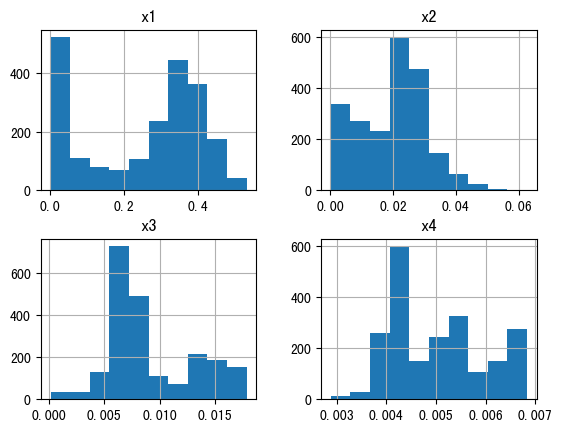

In [22]:
plt.figure(figsize=(8, 6), dpi =800 )
newdata2.hist()
plt.show( )

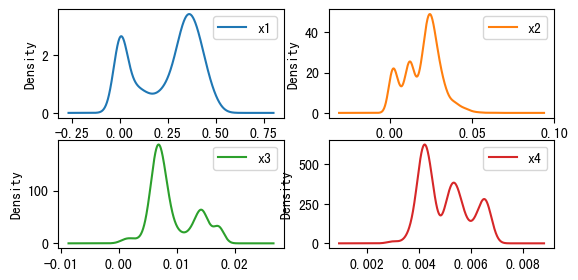

In [23]:
newdata2.plot(kind='density', subplots=True, layout= (3,2), sharex=False)
plt.show()

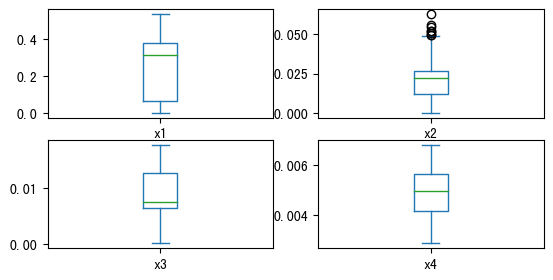

In [24]:
newdata2.plot(kind='box', subplots=True, layout= (3,2), sharex=False)
plt.show()

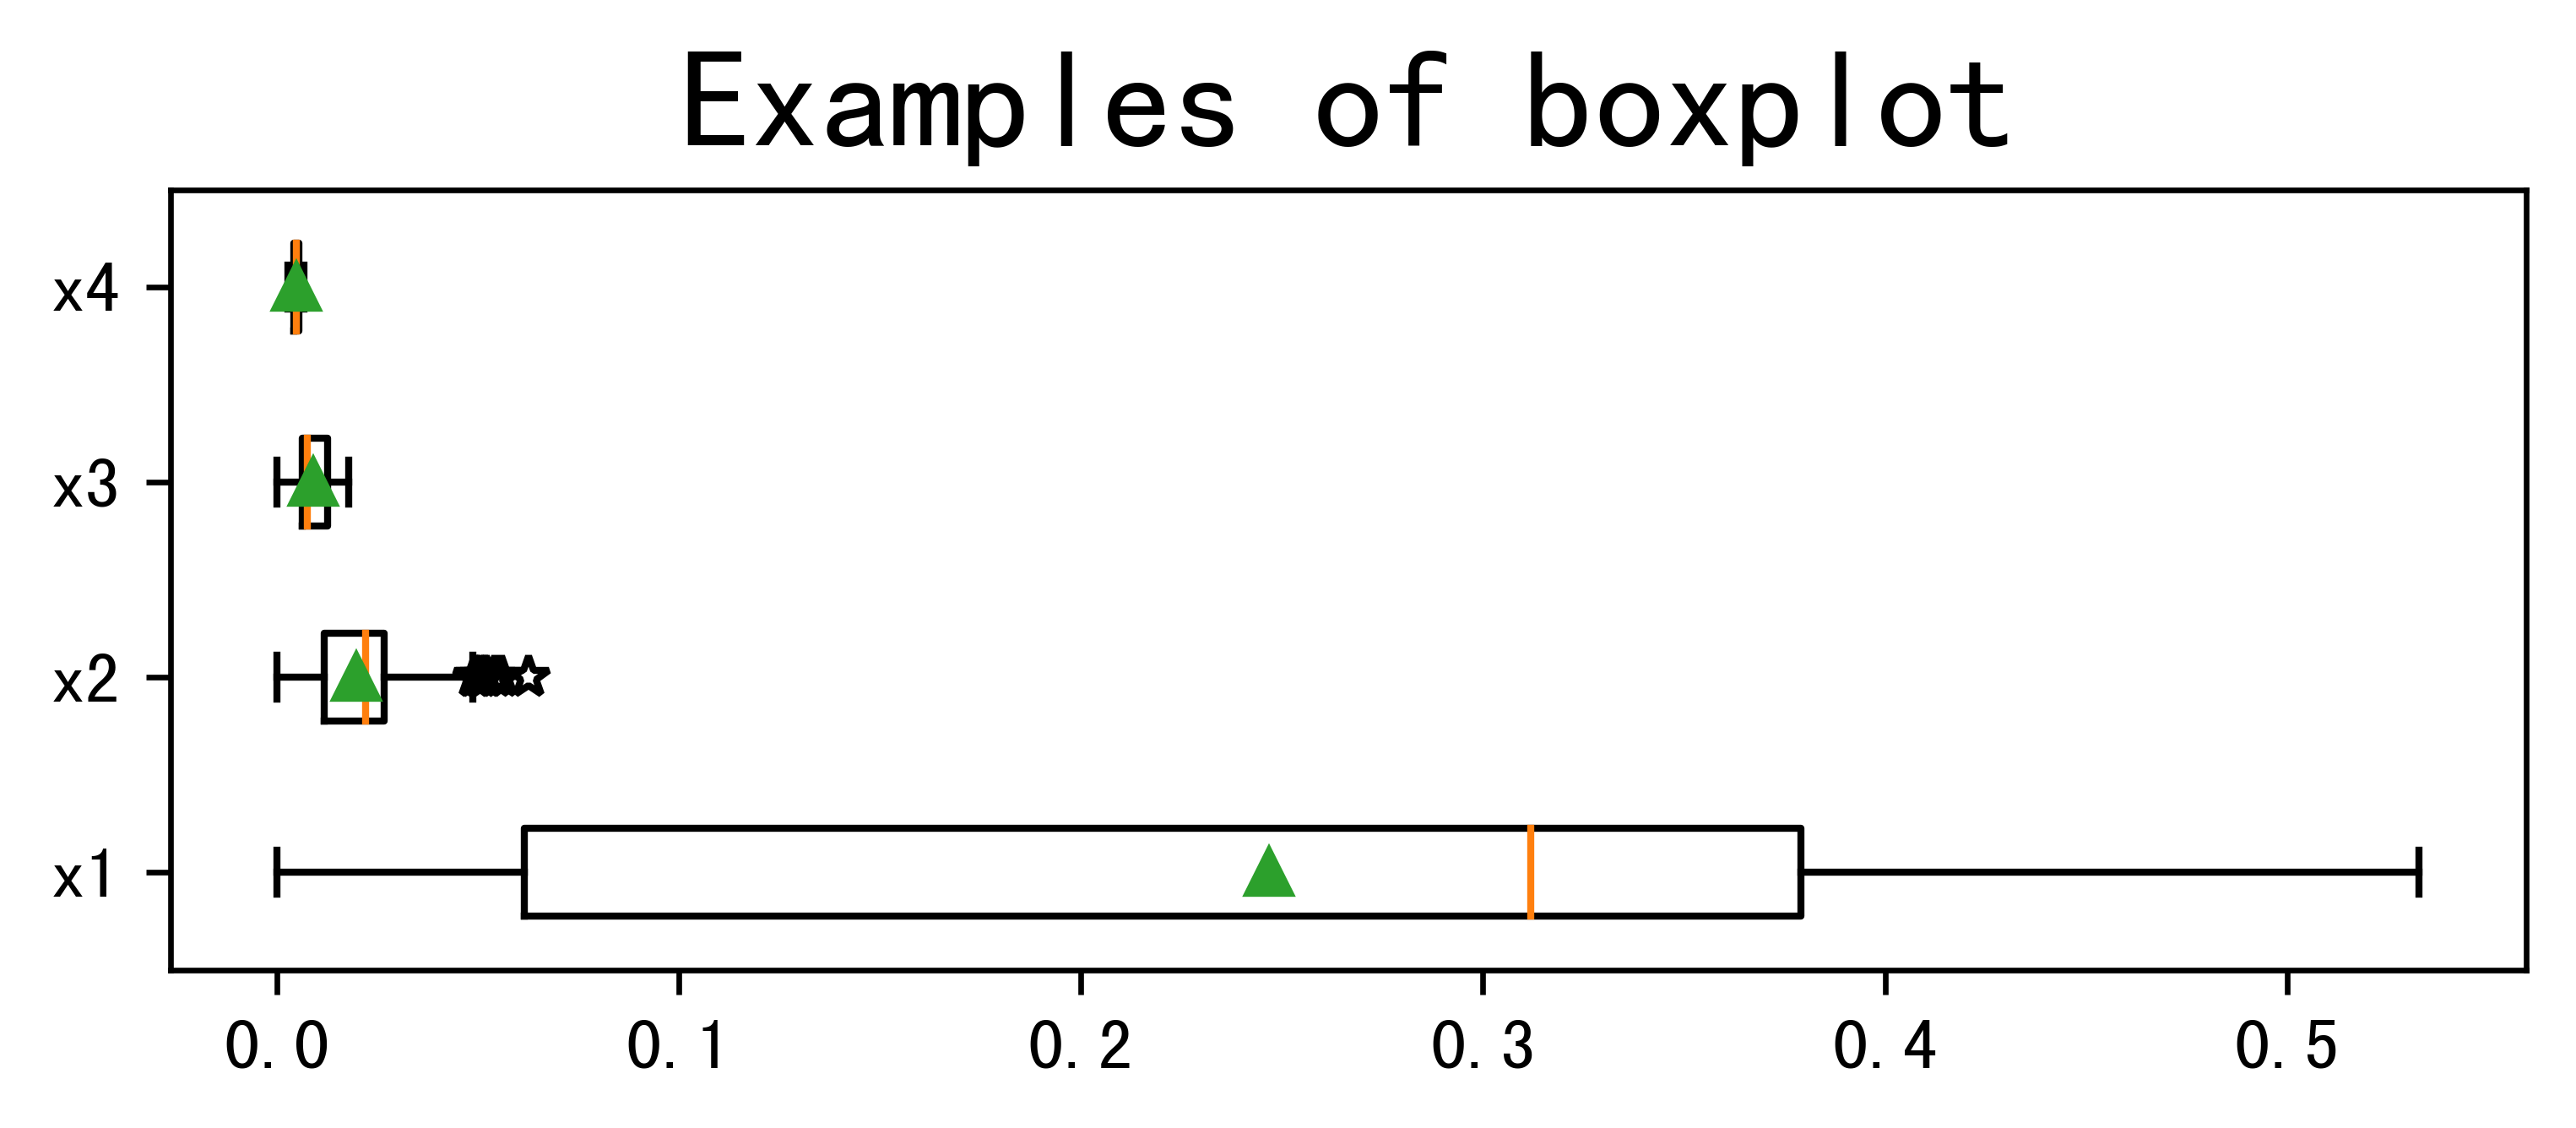

In [25]:
import pandas as pd
import matplotlib.pyplot as plt


box_1, box_2, box_3, box_4 = newdata2['x1'], newdata2['x2'], newdata2['x3'], newdata2['x4']

plt.figure(figsize=(6,2), dpi = 600)#设置画布的尺寸
plt.title('Examples of boxplot',fontsize=20)#标题，并设定字号大小
labels = 'x1','x2','x3','x4'  #图例

#vert=False:水平箱线图；showmeans=True：显示均值
plt.boxplot([box_1, box_2, box_3, box_4], labels = labels, vert=False,showmeans=True ,sym = '*')
plt.show()#显示图像

In [27]:
newdata2.to_csv("Processed data.csv",encoding = "utf_8_sig")


#### 分割训练集测试集

In [34]:
# 导入相关包
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn

In [35]:
newdata3 = newdata2
newdata3.shape
newdata3

,x1,x2,x3,x4,y
0,0.003141,0.000698,0.007504,0.004014,1
1,0.003141,0.001570,0.017449,0.004013,1
2,0.003143,0.013447,0.014146,0.004017,1
3,0.000349,0.004713,0.017455,0.004189,2
4,0.003319,0.002096,0.010130,0.004017,1
...,...,...,...,...,...
2149,0.001694,0.001186,0.005589,0.005928,5
2150,0.001692,0.010491,0.006769,0.005753,5
2151,0.002537,0.010824,0.007780,0.005750,5
2152,0.001861,0.008288,0.003721,0.005751,5


In [43]:
newdata3_X = newdata3.iloc[:, [0,1,2,3]]
newdata3_X

,x1,x2,x3,x4
0,0.003141,0.000698,0.007504,0.004014
1,0.003141,0.001570,0.017449,0.004013
2,0.003143,0.013447,0.014146,0.004017
3,0.000349,0.004713,0.017455,0.004189
4,0.003319,0.002096,0.010130,0.004017
...,...,...,...,...
2149,0.001694,0.001186,0.005589,0.005928
2150,0.001692,0.010491,0.006769,0.005753
2151,0.002537,0.010824,0.007780,0.005750
2152,0.001861,0.008288,0.003721,0.005751


In [44]:
newdata3_y = newdata3["y"]
newdata3_y

0       1
1       1
2       1
3       2
4       1
       ..
2149    5
2150    5
2151    5
2152    5
2153    5
Name: y, Length: 2154, dtype: category
Categories (6, object): ['1' < '2' < '3' < '4' < '5' < '6']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( newdata3_X, newdata3_y, test_size=0.2, random_state=0)

#### 模型训练

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

#### 1.线性回归

In [47]:
### 1.线性回归
# 从 sklean 中导入函数
from sklearn import linear_model
linear = linear_model.LinearRegression()

# 使用训练集拟合模型
linear.fit(X_train, y_train)
# 检查模型得分
linear.score(X_train, y_train)

# 方程系数和截距
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

# 预测测试集结果
y_pred = linear.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

# 打印得分
print("Train set score: {:.2f}".format(linear.score(X_train, y_train)))
print("Test set score: {:.2f}".format(linear.score(X_test, y_test)))

Coefficient: 
 [   4.1917584     9.4838421   -40.85959307 1124.98064832]
Intercept: 
 -1.7968709595823675
Test set predictions:
 [5.69042975 5.6398226  5.10296521 2.42397347 2.73418641 2.58687348
 4.59863401 5.73902851 5.46086043 4.12138329 4.64138986 2.25371917
 5.45159664 5.57692476 5.66962541 2.20812573 4.53600686 5.8569901
 5.5783031  2.59632984 2.2544305  5.62793429 5.68969023 5.70705462
 4.98820344 2.1589351  5.84158297 2.51987886 5.5276367  4.89564304
 5.63647409 4.34914176 5.36157717 2.59551219 5.69440292 4.96333028
 4.36376588 5.85619606 4.6419972  2.24583532 5.54904755 4.17355795
 5.38997816 4.60054906 5.44936154 4.57078068 5.49301591 4.48143093
 5.23660717 5.88944209 4.92669724 2.16745247 4.50645915 5.49919263
 2.34963187 5.62203973 2.26986714 5.43952153 5.69984843 4.32786321
 5.00503346 4.4701346  5.84132535 3.92758217 5.57987416 4.28508929
 6.22037012 5.23563495 5.46648849 5.02448337 6.30648019 4.85269446
 4.46054499 2.56296187 5.44516225 2.82748113 5.74589561 5.76252302
 

#### 2.逻辑回归

In [48]:
### 2.逻辑回归
# 从 sklean 中导入函数
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

# 进行模型拟合，训练集和测试集
logistic.fit(X_train, y_train)
logistic.score(X_train, y_train)

# 方程系数和截距
print('Coefficient: \n', logistic.coef_)
print('Intercept: \n', logistic.intercept_)

#输出预测值
y_pred1 = logistic.predict(X_test)
print("Test set predictions:\n {}".format(y_pred1))

# 打印得分
print("Train set score: {:.2f}".format(logistic.score(X_train, y_train)))
print("Test set score: {:.2f}".format(logistic.score(X_test, y_test)))

Coefficient: 
 [[-4.40097174 -0.27880233 -0.09301424 -0.10066504]
 [-6.29567286 -0.31286029  0.05505639 -0.1675454 ]
 [ 9.62166455  0.78868155 -0.53164592 -0.10204027]
 [ 1.07498005 -0.19701892  0.56960378  0.37025071]]
Intercept: 
 [-0.4108856   0.35192736 -0.37092022  0.42987847]
Test set predictions:
 ['5' '5' '6' '6' '5' '6' '6' '5' '5' '5' '5' '6' '6' '5' '5' '6' '5' '5'
 '6' '6' '6' '5' '5' '5' '5' '6' '5' '6' '5' '5' '5' '5' '6' '6' '5' '5'
 '5' '5' '5' '6' '5' '6' '5' '5' '5' '5' '6' '5' '5' '5' '6' '6' '5' '5'
 '6' '5' '6' '5' '5' '5' '6' '5' '5' '5' '5' '5' '5' '5' '6' '6' '5' '6'
 '5' '6' '5' '6' '5' '5' '6' '5' '5' '5' '5' '5' '5' '6' '5' '5' '5' '5'
 '5' '5' '5' '5' '5' '6' '6' '5' '5' '5' '5' '5' '5' '5' '6' '5' '5' '5'
 '5' '5' '6' '5' '6' '5' '5' '6' '5' '5' '6' '5' '5' '5' '6' '6' '5' '5'
 '5' '5' '5' '5' '6' '5' '6' '5' '6' '5' '5' '5' '5' '6' '5' '6' '5' '5'
 '5' '6' '5' '6' '5' '5' '5' '6' '6' '5' '5' '5' '5' '5' '6' '5' '5' '5'
 '6' '5' '6' '5' '6' '5' '5' '5' '6' 

#### 3.决策树

In [49]:
### 3.决策树
# 从 sklean 中导入函数
from sklearn import tree
tree = tree.DecisionTreeClassifier(criterion='gini') 

# 对于分类，这里您可以将算法更改为 gini 或 entropy (information gain)，默认是 gini 。
tree.fit(X_train, y_train)

# 输出预测值
y_pred2 = tree.predict(X_test)
print("Test set predictions:\n {}".format(y_pred2))

# 打印得分
print("Test set score: {:.2f}".format(tree.score(X_train, y_train)))
print("Test set score: {:.2f}".format(tree.score(X_test, y_test)))

Test set predictions:
 ['5' '5' '6' '2' '5' '1' '5' '6' '5' '5' '5' '1' '6' '6' '6' '2' '5' '5'
 '6' '2' '2' '6' '5' '5' '5' '1' '5' '2' '5' '5' '6' '5' '5' '1' '6' '5'
 '5' '5' '5' '2' '5' '5' '6' '5' '5' '5' '6' '5' '5' '6' '6' '2' '5' '5'
 '1' '5' '1' '6' '5' '5' '5' '5' '5' '5' '5' '5' '6' '5' '6' '5' '6' '6'
 '5' '1' '6' '2' '5' '5' '1' '5' '5' '5' '5' '5' '5' '2' '5' '6' '5' '5'
 '5' '6' '5' '5' '6' '2' '1' '6' '6' '5' '5' '5' '5' '5' '6' '5' '5' '5'
 '5' '6' '6' '5' '6' '5' '5' '6' '5' '5' '2' '5' '5' '5' '5' '1' '5' '5'
 '5' '5' '5' '5' '5' '5' '2' '5' '2' '5' '5' '5' '6' '5' '6' '2' '6' '5'
 '5' '1' '5' '6' '5' '5' '5' '5' '1' '5' '6' '5' '5' '6' '2' '5' '6' '5'
 '2' '5' '6' '5' '2' '5' '5' '5' '2' '6' '5' '6' '5' '5' '5' '6' '2' '1'
 '5' '5' '5' '5' '1' '5' '5' '1' '6' '1' '5' '5' '5' '5' '5' '5' '1' '5'
 '5' '5' '5' '1' '5' '5' '6' '5' '5' '5' '6' '6' '1' '5' '5' '5' '5' '6'
 '5' '5' '1' '5' '5' '6' '6' '6' '5' '5' '5' '2' '6' '2' '5' '5' '5' '5'
 '5' '5' '6' '2' '1' '6' '5'

#### 4.支持向量机(SVM)

In [50]:
### 4.支持向量机(SVM)
# 从 sklean 中导入函数
from sklearn import svm
model = svm.SVC()

# 进行模型拟合，训练集和测试集
model.fit(X_train, y_train)

# 输出预测值
y_pred3= model.predict(X_test)
print("Test set predictions:\n {}".format(y_pred3))

# 打印得分
print("Test set score: {:.2f}".format(model.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model.score(X_test, y_test)))

Test set predictions:
 ['5' '5' '6' '2' '5' '2' '6' '6' '5' '5' '5' '2' '6' '6' '6' '2' '5' '5'
 '2' '2' '2' '6' '5' '5' '5' '2' '5' '2' '5' '5' '6' '5' '2' '2' '6' '5'
 '5' '5' '5' '2' '5' '2' '6' '5' '5' '5' '6' '5' '5' '6' '2' '2' '5' '5'
 '2' '5' '2' '5' '5' '5' '2' '5' '5' '5' '5' '5' '5' '5' '2' '2' '5' '6'
 '5' '2' '5' '2' '5' '5' '2' '5' '5' '5' '5' '5' '5' '2' '5' '5' '5' '5'
 '5' '6' '5' '5' '5' '2' '2' '6' '6' '5' '5' '5' '5' '5' '2' '5' '5' '5'
 '5' '6' '6' '5' '6' '5' '5' '6' '5' '5' '2' '5' '5' '5' '2' '2' '5' '5'
 '5' '5' '5' '5' '2' '5' '2' '5' '2' '5' '5' '5' '6' '6' '6' '2' '6' '5'
 '5' '2' '5' '6' '5' '5' '5' '2' '2' '5' '5' '5' '5' '6' '2' '5' '5' '5'
 '2' '5' '6' '5' '2' '5' '5' '5' '2' '6' '5' '6' '5' '2' '5' '2' '2' '2'
 '2' '5' '5' '5' '2' '5' '5' '2' '6' '2' '5' '5' '5' '5' '5' '5' '2' '5'
 '5' '5' '5' '2' '5' '5' '6' '5' '5' '5' '6' '6' '2' '5' '5' '2' '5' '6'
 '5' '5' '2' '5' '5' '2' '5' '6' '5' '5' '5' '2' '6' '2' '5' '5' '5' '5'
 '5' '5' '5' '2' '2' '6' '5'

#### 5.朴素贝叶斯

In [51]:
### 5.朴素贝叶斯
# 从 sklean 中导入函数
from sklearn.naive_bayes import GaussianNB
model = GaussianNB() 
# 多项式类还有其他分布，例如 BernoulliNB（伯努利朴素贝叶斯）

# 进行模型拟合，训练集和测试集
model.fit(X_train, y_train)
model.score(X_train, y_train)

# 输出预测值
y_pred4= model.predict(X_test)
print("Test set predictions:\n {}".format(y_pred4))

# 打印得分
print("Test set score: {:.2f}".format(model.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model.score(X_test, y_test)))

Test set predictions:
 ['5' '5' '6' '2' '5' '1' '6' '6' '5' '5' '5' '1' '6' '6' '6' '2' '5' '5'
 '6' '2' '2' '6' '5' '5' '5' '1' '5' '2' '5' '5' '6' '5' '5' '1' '6' '5'
 '5' '5' '5' '2' '5' '6' '6' '5' '5' '5' '6' '5' '5' '6' '6' '2' '5' '5'
 '1' '5' '1' '5' '5' '5' '6' '5' '5' '5' '5' '5' '6' '5' '6' '6' '6' '6'
 '5' '1' '5' '2' '5' '5' '1' '5' '5' '5' '5' '5' '5' '2' '5' '6' '5' '5'
 '5' '6' '5' '5' '6' '2' '1' '6' '6' '5' '5' '5' '5' '5' '6' '5' '5' '5'
 '5' '6' '6' '5' '6' '5' '5' '6' '5' '5' '2' '5' '5' '5' '6' '1' '5' '5'
 '5' '5' '5' '5' '6' '5' '2' '5' '2' '5' '5' '5' '6' '6' '6' '2' '6' '5'
 '5' '1' '5' '6' '5' '5' '5' '6' '1' '5' '6' '5' '5' '6' '2' '5' '5' '5'
 '2' '5' '6' '5' '2' '5' '5' '5' '2' '6' '5' '6' '5' '6' '5' '6' '2' '1'
 '6' '5' '5' '5' '1' '5' '5' '1' '6' '1' '5' '5' '5' '5' '5' '5' '1' '5'
 '5' '5' '5' '1' '5' '5' '6' '5' '5' '5' '6' '6' '1' '5' '5' '6' '5' '6'
 '5' '5' '1' '5' '5' '6' '5' '6' '5' '5' '5' '2' '6' '2' '5' '5' '5' '5'
 '5' '5' '5' '2' '1' '6' '5'

#### 6.K-邻近算法（KNN）

In [52]:
### 6.K-邻近算法（KNN）
# 从 sklean 中导入函数
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier( n_neighbors = 6 ) 
# n_neighbors的默认值为5

# 进行模型拟合，训练集和测试集
model.fit(X_train, y_train)
model.score(X_train, y_train)

# 输出预测值
y_pred5= model.predict(X_test)
print("Test set predictions:\n {}".format(y_pred5))

# 打印得分
print("Test set score: {:.2f}".format(model.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model.score(X_test, y_test)))

Test set predictions:
 ['5' '5' '6' '2' '5' '1' '5' '6' '5' '5' '5' '2' '6' '6' '6' '2' '5' '5'
 '5' '1' '2' '6' '5' '5' '5' '2' '5' '1' '5' '5' '6' '5' '2' '1' '6' '5'
 '5' '5' '5' '2' '5' '5' '6' '5' '5' '5' '6' '5' '5' '5' '6' '2' '5' '5'
 '1' '5' '1' '5' '5' '5' '5' '5' '5' '5' '5' '5' '6' '5' '6' '6' '5' '6'
 '5' '1' '5' '2' '5' '5' '1' '5' '5' '5' '5' '5' '5' '2' '5' '6' '5' '5'
 '5' '6' '5' '5' '5' '2' '1' '6' '6' '5' '5' '5' '5' '5' '5' '5' '5' '5'
 '5' '6' '6' '5' '6' '5' '5' '6' '5' '5' '2' '5' '5' '5' '6' '2' '5' '5'
 '5' '5' '5' '5' '6' '5' '2' '5' '2' '5' '5' '5' '6' '5' '6' '2' '6' '5'
 '5' '2' '5' '5' '5' '5' '5' '6' '2' '5' '6' '5' '5' '6' '1' '5' '5' '5'
 '2' '5' '6' '5' '2' '5' '5' '5' '1' '6' '5' '6' '5' '6' '5' '6' '2' '1'
 '5' '5' '5' '5' '2' '5' '5' '2' '6' '1' '5' '5' '5' '5' '5' '5' '1' '5'
 '5' '5' '5' '1' '5' '5' '6' '5' '5' '5' '6' '6' '1' '5' '5' '6' '5' '6'
 '5' '5' '2' '5' '5' '6' '5' '6' '5' '5' '5' '2' '6' '6' '5' '5' '5' '5'
 '5' '5' '5' '1' '2' '6' '5'

#### 8.随机森林（RandomForestClassifier）

In [53]:
### 8.随机森林（RandomForestClassifier）
# 从 sklean 中导入函数
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()

# 进行模型拟合，训练集和测试集
model.fit(X_train, y_train)
model.score(X_train, y_train)

# 输出预测值
y_pred6= model.predict(X_test)
print("Test set predictions:\n {}".format(y_pred6))

# 打印得分
print("Test set score: {:.2f}".format(model.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model.score(X_test, y_test)))

Test set predictions:
 ['5' '5' '6' '2' '5' '1' '5' '6' '5' '5' '5' '1' '6' '6' '6' '2' '5' '5'
 '6' '2' '2' '6' '5' '5' '5' '1' '5' '2' '5' '5' '6' '5' '5' '1' '6' '5'
 '5' '5' '5' '2' '5' '5' '6' '5' '5' '5' '6' '5' '5' '6' '6' '2' '5' '5'
 '1' '5' '1' '5' '5' '5' '5' '5' '5' '5' '5' '5' '6' '5' '6' '5' '6' '5'
 '5' '1' '5' '2' '6' '5' '1' '5' '5' '5' '5' '5' '5' '2' '5' '6' '5' '5'
 '5' '6' '5' '5' '6' '2' '1' '6' '6' '5' '5' '5' '5' '5' '6' '5' '5' '5'
 '5' '6' '6' '5' '6' '5' '5' '6' '5' '5' '2' '5' '5' '5' '5' '1' '5' '5'
 '5' '5' '5' '5' '5' '5' '2' '5' '2' '5' '5' '5' '6' '5' '6' '2' '6' '5'
 '5' '1' '5' '6' '5' '5' '5' '5' '1' '5' '6' '5' '5' '6' '2' '5' '5' '5'
 '2' '5' '6' '5' '2' '5' '5' '5' '2' '6' '5' '6' '5' '5' '5' '6' '2' '1'
 '5' '5' '5' '5' '1' '5' '5' '1' '6' '1' '5' '5' '5' '5' '5' '5' '1' '5'
 '5' '5' '5' '1' '5' '5' '6' '5' '5' '5' '6' '6' '1' '5' '5' '5' '5' '6'
 '5' '5' '1' '5' '5' '6' '5' '6' '5' '5' '5' '2' '6' '2' '5' '5' '5' '5'
 '5' '5' '5' '2' '1' '6' '5'

#### 10.梯度提升分类器(Gradient Boosing) 和 Ada Boost

In [54]:
### 10.梯度提升分类器(Gradient Boosing) 和 Ada Boost
# 从 sklean 中导入函数
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

# 进行模型拟合，训练集
model.fit(X_train, y_train)

# 输出预测值
y_pred7= model.predict(X_test)
print("Test set predictions:\n {}".format(y_pred7))

# 打印得分
print("Test set score: {:.2f}".format(model.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model.score(X_test, y_test)))

Test set predictions:
 ['5' '5' '6' '2' '1' '1' '5' '6' '5' '1' '5' '1' '6' '6' '6' '2' '5' '5'
 '6' '2' '2' '6' '5' '5' '5' '1' '5' '2' '5' '5' '6' '5' '5' '1' '6' '5'
 '5' '5' '5' '2' '5' '5' '6' '1' '5' '5' '6' '5' '5' '6' '6' '2' '5' '5'
 '1' '5' '1' '5' '5' '5' '5' '5' '5' '1' '5' '5' '6' '5' '6' '5' '6' '5'
 '5' '1' '5' '2' '6' '5' '1' '5' '5' '1' '5' '5' '1' '2' '5' '6' '5' '5'
 '5' '6' '5' '5' '6' '2' '1' '6' '6' '5' '5' '5' '5' '5' '6' '5' '5' '5'
 '5' '6' '6' '5' '6' '5' '5' '6' '5' '5' '2' '5' '5' '5' '5' '1' '5' '1'
 '5' '5' '5' '5' '5' '5' '2' '1' '2' '5' '5' '5' '6' '5' '6' '2' '6' '5'
 '5' '1' '5' '6' '5' '5' '5' '5' '1' '5' '6' '5' '1' '6' '2' '5' '5' '5'
 '2' '1' '6' '1' '2' '5' '5' '5' '2' '6' '5' '6' '5' '5' '5' '6' '2' '1'
 '5' '1' '5' '5' '1' '1' '5' '1' '6' '1' '5' '5' '5' '5' '5' '1' '1' '5'
 '5' '5' '5' '1' '5' '5' '6' '5' '5' '5' '6' '6' '1' '5' '5' '5' '5' '6'
 '5' '5' '1' '5' '5' '6' '6' '6' '5' '5' '5' '2' '6' '2' '5' '5' '1' '5'
 '5' '1' '5' '2' '1' '6' '5'

#### 11.线性判别分析(LDA)

In [55]:
# 线性判别分析(LDA)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()

# 进行模型拟合，训练集和测试集
model.fit(X_train, y_train)
model.score(X_train, y_train)

# 输出预测值
y_pred8= model.predict(X_test)
print("Test set predictions:\n {}".format(y_pred8))

# 打印得分
print("Test set score: {:.2f}".format(model.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model.score(X_test, y_test)))

Test set predictions:
 ['5' '5' '6' '2' '1' '1' '6' '6' '5' '5' '5' '2' '6' '6' '6' '2' '5' '5'
 '6' '1' '2' '6' '5' '5' '5' '2' '5' '2' '5' '5' '6' '5' '6' '1' '6' '5'
 '5' '5' '5' '2' '5' '6' '6' '5' '5' '5' '6' '5' '5' '6' '6' '2' '5' '5'
 '1' '5' '2' '5' '5' '5' '6' '5' '5' '5' '5' '5' '6' '5' '6' '6' '6' '6'
 '5' '1' '5' '1' '5' '5' '2' '5' '5' '5' '5' '5' '5' '1' '5' '6' '5' '5'
 '5' '6' '5' '5' '6' '2' '2' '6' '6' '5' '5' '5' '5' '5' '6' '5' '5' '5'
 '5' '6' '6' '5' '6' '5' '5' '6' '5' '5' '1' '5' '5' '5' '6' '2' '5' '5'
 '5' '5' '5' '5' '6' '5' '2' '5' '2' '5' '5' '5' '6' '6' '6' '2' '6' '5'
 '5' '2' '5' '6' '5' '5' '5' '6' '2' '5' '6' '5' '5' '6' '1' '5' '5' '5'
 '2' '5' '6' '5' '2' '5' '5' '5' '1' '6' '5' '6' '5' '6' '5' '6' '1' '2'
 '6' '5' '5' '5' '2' '5' '5' '2' '6' '1' '5' '5' '5' '5' '5' '5' '2' '5'
 '5' '5' '5' '1' '5' '5' '6' '5' '5' '5' '6' '6' '2' '5' '5' '6' '5' '6'
 '5' '5' '2' '5' '5' '6' '5' '6' '5' '5' '5' '2' '6' '1' '5' '5' '5' '5'
 '5' '5' '5' '2' '2' '6' '5'

In [56]:

result = pd.DataFrame(zip(y_test,y_pred,y_pred1,y_pred2,y_pred3,y_pred4,y_pred5,y_pred6,y_pred7,y_pred8))
result.rename({0:"y_true", 1:"y_liner", 2:"y_Logistic", 3:"y_tree", 4:"y_SVM", 5:"y_naive_bayes", 6:"y_KNeighbors", 7:"y_RandomForest", 8:"y_Ada Boost", 9:"y_LDA" },axis = 1,inplace= True)
result

,y_true,y_liner,y_Logistic,y_tree,y_SVM,y_naive_bayes,y_KNeighbors,y_RandomForest,y_Ada Boost,y_LDA
0,5,5.690430,5,5,5,5,5,5,5,5
1,5,5.639823,5,5,5,5,5,5,5,5
2,6,5.102965,6,6,6,6,6,6,6,6
3,2,2.423973,6,2,2,2,2,2,2,2
4,5,2.734186,5,5,5,5,5,5,1,1
...,...,...,...,...,...,...,...,...,...,...
426,6,6.199712,5,6,5,6,5,6,6,6
427,5,4.927542,5,5,5,5,5,5,5,5
428,5,4.882361,5,5,5,5,5,5,5,5
429,5,4.972167,5,5,5,5,5,5,5,5


In [57]:
result.to_csv("predicted.csv")

In [58]:
predicted = pd.read_csv("predicted.csv")
predicted

,Unnamed: 0,y_true,y_liner,y_Logistic,y_tree,y_SVM,y_naive_bayes,y_KNeighbors,y_RandomForest,y_Ada Boost,y_LDA
0,0,5,5.690430,5,5,5,5,5,5,5,5
1,1,5,5.639823,5,5,5,5,5,5,5,5
2,2,6,5.102965,6,6,6,6,6,6,6,6
3,3,2,2.423973,6,2,2,2,2,2,2,2
4,4,5,2.734186,5,5,5,5,5,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...
426,426,6,6.199712,5,6,5,6,5,6,6,6
427,427,5,4.927542,5,5,5,5,5,5,5,5
428,428,5,4.882361,5,5,5,5,5,5,5,5
429,429,5,4.972167,5,5,5,5,5,5,5,5
